# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import xgboost as xgb


# Loading the machine learning packages 
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder



In [0]:
  data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [136]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


In [137]:
# Extracting the features and label
le = LabelEncoder()
le.fit(attrition_data['Gender'].astype(str))
attrition_data['Gender'] = le.transform(attrition_data['Gender'].astype(str))

le.fit(attrition_data['MaritalStatus'].astype(str))
attrition_data['MaritalStatus'] = le.transform(attrition_data['MaritalStatus'].astype(str))

le.fit(attrition_data['OverTime'].astype(bool))
attrition_data['OverTime'] = le.transform(attrition_data['OverTime'].astype(bool))


print (attrition_data.select_dtypes(include=[object]))

attrition_data['BusinessTravel'] = pd.Categorical(attrition_data['BusinessTravel'])
dfDummies = pd.get_dummies(attrition_data['BusinessTravel'])
attrition_data = pd.concat([attrition_data, dfDummies], axis=1)

attrition_data['Department'] = pd.Categorical(attrition_data['Department'])
dfDummies = pd.get_dummies(attrition_data['Department'])
attrition_data = pd.concat([attrition_data, dfDummies], axis=1)

attrition_data['EducationField'] = pd.Categorical(attrition_data['EducationField'])
dfDummies = pd.get_dummies(attrition_data['EducationField'])
attrition_data = pd.concat([attrition_data, dfDummies], axis=1)

attrition_data['JobRole'] = pd.Categorical(attrition_data['JobRole'])
dfDummies = pd.get_dummies(attrition_data['JobRole'])
attrition_data = pd.concat([attrition_data, dfDummies], axis=1)

attrition_data.drop(['BusinessTravel','Department','EducationField','JobRole','OverTime','MaritalStatus','Gender', 'ID'], axis='columns', inplace=True)
print (attrition_data.head())


X = attrition_data.drop(['Attrition'], axis = 1)
y = attrition_data['Attrition']

#Perform one hot encoding before splitting data into train and test
X.isna()
y.isna()

         BusinessTravel  ...                JobRole
0         Travel_Rarely  ...        Sales Executive
1     Travel_Frequently  ...     Research Scientist
2         Travel_Rarely  ...  Laboratory Technician
3     Travel_Frequently  ...     Research Scientist
4         Travel_Rarely  ...  Laboratory Technician
...                 ...  ...                    ...
1023      Travel_Rarely  ...     Research Scientist
1024      Travel_Rarely  ...      Research Director
1025      Travel_Rarely  ...        Sales Executive
1026      Travel_Rarely  ...        Sales Executive
1027      Travel_Rarely  ...  Laboratory Technician

[1028 rows x 4 columns]
   Age  Attrition  ...  Sales Executive  Sales Representative
0   41          1  ...                1                     0
1   49          0  ...                0                     0
2   37          1  ...                0                     0
3   33          0  ...                0                     0
4   27          0  ...                0  

0       False
1       False
2       False
3       False
4       False
        ...  
1023    False
1024    False
1025    False
1026    False
1027    False
Name: Attrition, Length: 1028, dtype: bool

In [138]:
attrition_data.head()
attrition_data.shape
attrition_data.Attrition.value_counts()

0    856
1    172
Name: Attrition, dtype: int64

In [139]:

# Splitting the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

# Instantiating the classifier 
rfr = RandomForestRegressor(n_estimators=25,
                            random_state=1111,
                            max_features=4)

# Fitting the instantiator 
rfr.fit(X_train, y_train)

# Printing the training and testing accuracies 
print('The training error is {0:.2f}'.format(mean_absolute_error(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(mean_absolute_error(y_test, rfr.predict(X_test))))


#rfr.get_params()


The training error is 0.10
The testing error is 0.26


In [140]:
rfr.fit(X_train, y_train)
rfr.feature_importances_



array([0.07586056, 0.0554889 , 0.04717832, 0.019001  , 0.        ,
       0.05815301, 0.03141645, 0.04680968, 0.03792099, 0.01956451,
       0.02393623, 0.05839087, 0.04866229, 0.02893205, 0.03144985,
       0.00582977, 0.02524916, 0.02546419, 0.05478549, 0.02663055,
       0.02690976, 0.03479911, 0.03785892, 0.02924057, 0.02933786,
       0.00662568, 0.01347357, 0.00925674, 0.00179163, 0.00597815,
       0.00627409, 0.00079184, 0.0085033 , 0.00499535, 0.0116033 ,
       0.00558693, 0.00768385, 0.00361859, 0.00234455, 0.00798037,
       0.00380012, 0.00277938, 0.00081754, 0.00632803, 0.00576877,
       0.00512812])

In [141]:
from sklearn.metrics import accuracy_score

test_scores, train_scores = [], []
for i in [1, 2, 3, 4, 5, 10, 20, 50]:

    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(X_train, y_train) # print(rfc)

    train_predictions = rfc.predict(X_train)
    test_predictions = rfc.predict(X_test)

    train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test, test_predictions), 2))

# Print the train and test scores.
print("The training scores were: {}".format(train_scores))
print("The testing scores were: {}".format(test_scores))

The training scores were: [0.92, 0.92, 0.97, 0.95, 0.97, 0.98, 0.99, 1.0]
The testing scores were: [0.78, 0.83, 0.83, 0.83, 0.83, 0.84, 0.84, 0.86]


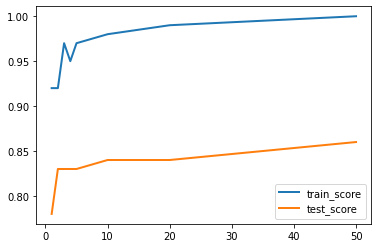

In [142]:
z = [1, 2, 3, 4, 5, 10, 20, 50]
plt.plot(z, train_scores, linewidth=2)
plt.plot(z, test_scores, linewidth=2)
plt.legend(['train_score', 'test_score'], loc='lower right')

(1028, 47)

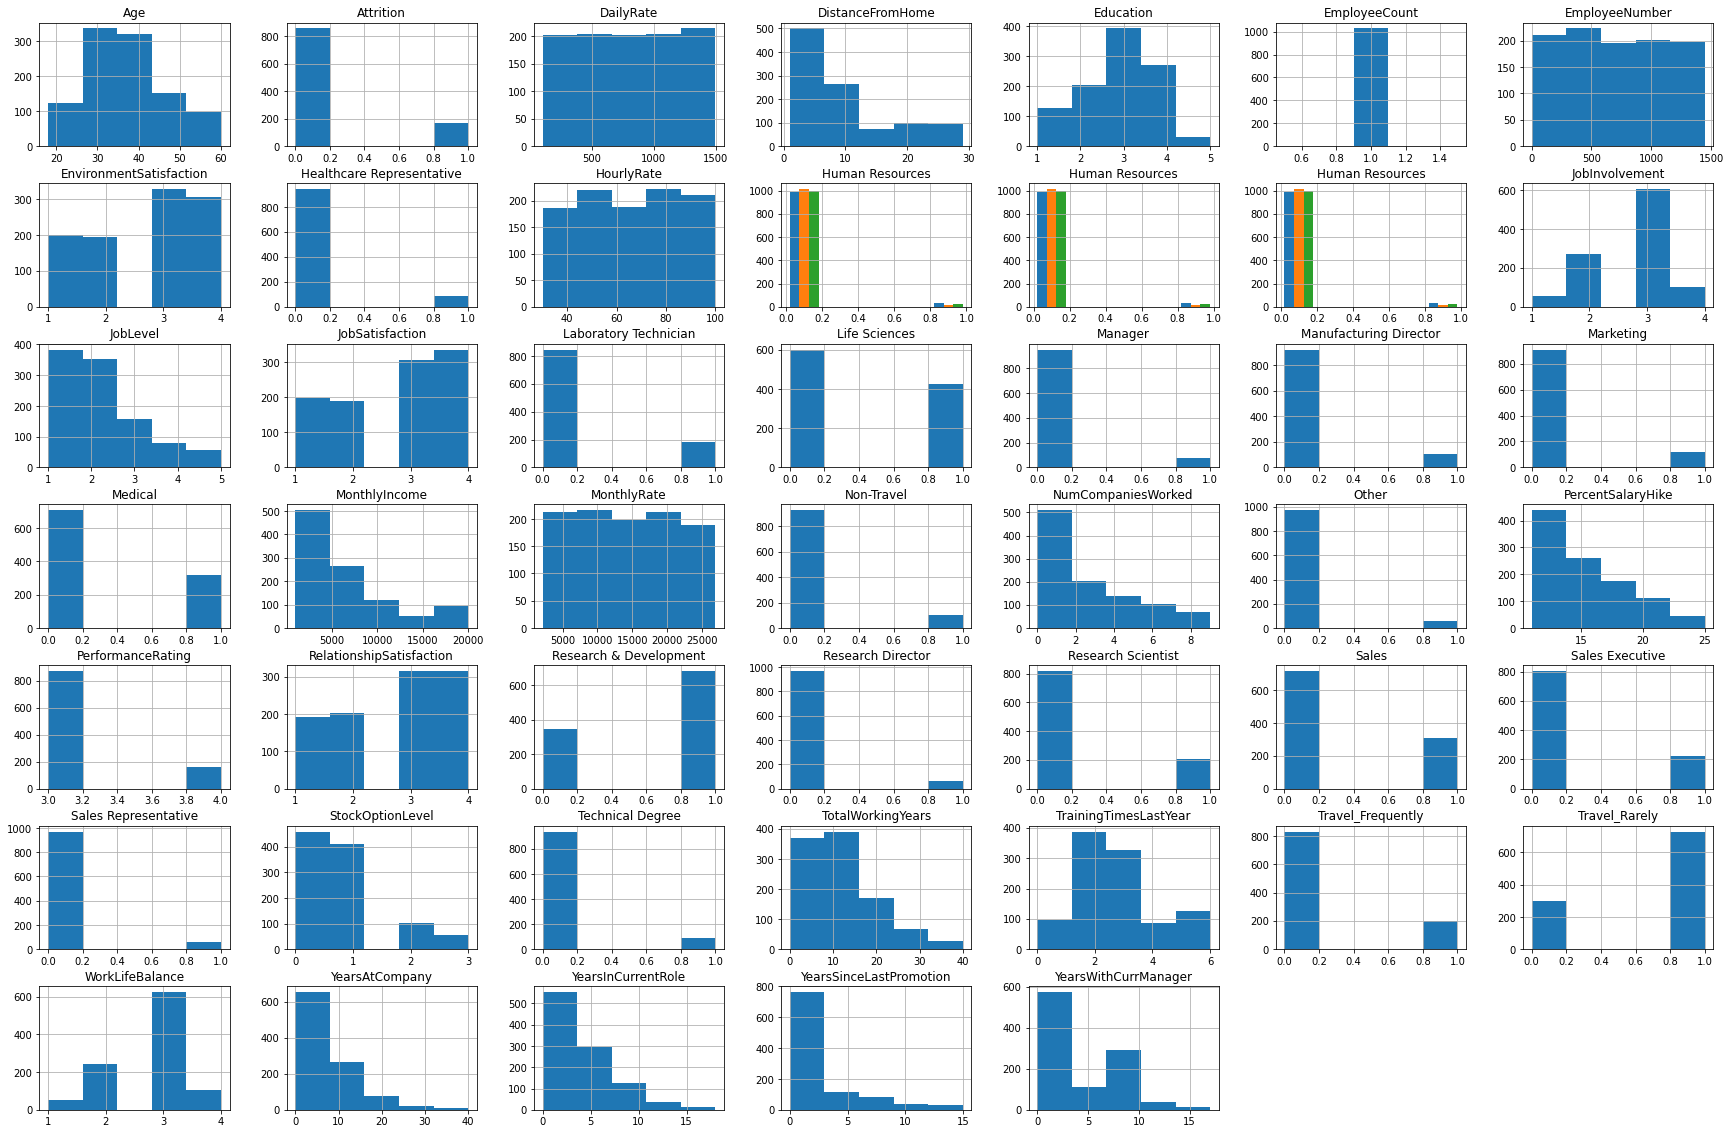

In [143]:
fig = plt.figure(figsize = (30,20))
ax = fig.gca()
attrition_data.hist(ax = ax, bins=5)
attrition_data.shape


## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

In [144]:
attrition_data.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Non-Travel',
       'Travel_Frequently', 'Travel_Rarely', 'Human Resources',
       'Research & Development', 'Sales', 'Human Resources', 'Life Sciences',
       'Marketing', 'Medical', 'Other', 'Technical Degree',
       'Healthcare Representative', 'Human Resources', 'Laboratory Technician',
       'Manager', 'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative'],
      dtype='object

In [145]:
# Printing the shape of the data 
attrition_data.shape

(1028, 47)

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  

In [146]:
attrition_data.head(4)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,41,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,49,0,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,37,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [147]:
# Printing the types of data in the dataset 
#print(attrition_data.info())

# Checking for missing values
print(attrition_data.isna().sum())



Age                          0
Attrition                    0
DailyRate                    0
DistanceFromHome             0
Education                    0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobSatisfaction              0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
Non-Travel                   0
Travel_Frequently            0
Travel_Rarely                0
Human Resources              0
Research & Development       0
Sales                        0
Human Re

In [148]:
# Finding the number of distinct classes
attrition_data.Attrition.value_counts()

0    856
1    172
Name: Attrition, dtype: int64

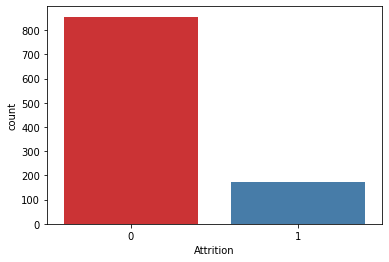

In [149]:
sns.countplot(attrition_data['Attrition'], palette='Set1')
plt.show()


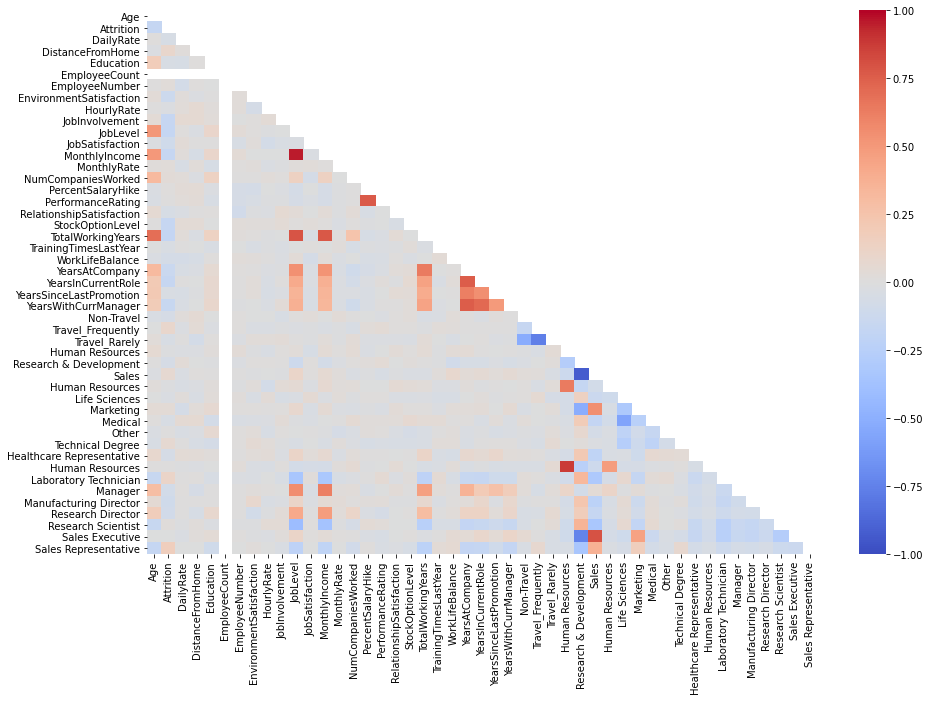

In [150]:
# Visualizing the correlation matrix 
plt.figure(figsize=(15,10))
mask = np.zeros_like(attrition_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(attrition_data.corr(), 
            vmin = -1,
            cmap='coolwarm',            
            mask=mask)
plt.show()

In [151]:
attrition_data.head(10)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,41,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,49,0,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,37,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,27,0,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5,32,0,1005,2,2,1,8,4,79,3,1,4,3068,11864,0,13,3,3,0,8,2,2,7,7,3,6,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
6,59,0,1324,3,3,1,10,3,81,4,1,1,2670,9964,4,20,4,1,3,12,3,2,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
7,30,0,1358,24,1,1,11,4,67,3,1,3,2693,13335,1,22,4,2,1,1,2,3,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
8,38,0,216,23,3,1,12,4,44,2,3,3,9526,8787,0,21,4,2,0,10,2,3,9,7,1,8,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
9,36,0,1299,27,3,1,13,3,94,3,2,3,5237,16577,6,13,3,2,2,17,3,2,7,7,7,7,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [0]:
# split data into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)


In [153]:
X_train_nda = X_train.values
y_train_nda = y_train.values
X_test_nda = X_test.values
y_test_nda = y_test.values
#Instantiating the classifier and fitting it 
xgb_clf = xgb.XGBClassifier(learning_rate=0.01)
xgb_clf.fit(X_train_nda, y_train_nda)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [154]:
# Applying classifier on train (seen) set
predictions = xgb_clf.predict(X_train_nda)
# accuracy score
accuracy = accuracy_score(y_train_nda, predictions)
print(np.round(accuracy*100, 2), '%')

85.89 %


In [155]:
# Applying classifier on test (unseen) set
predictions = xgb_clf.predict(X_test_nda)
# accuracy score
accuracy = accuracy_score(y_test_nda, predictions)
print(np.round(accuracy*100, 2), '%')



84.47 %


In [156]:
print(confusion_matrix(y_test_nda, predictions))
print("="*60)
print(classification_report(y_test_nda, predictions))
# plot roc auc

[[170   2]
 [ 30   4]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       172
           1       0.67      0.12      0.20        34

    accuracy                           0.84       206
   macro avg       0.76      0.55      0.56       206
weighted avg       0.82      0.84      0.80       206



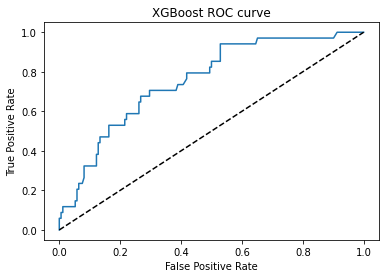

In [157]:


from sklearn.metrics import roc_curve  
probs = xgb_clf.predict_proba(X_test_nda)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test_nda, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
# show the plot
plt.show()



In [158]:

#Cross validation score

#Disadvantages of train_test_split:

#    train/test split does have its dangers — what if the split we make isn’t random?
#    What if one subset of our data has only people from a certain class of a particular feature?
#    This will result in overfitting, even though we’re trying to avoid it! This is where cross validation comes in.

    

from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, random_state=123)
results = cross_val_score(xgb_clf, X_train, y_train, cv=kfold)
print(results)



[nan nan nan nan nan nan nan nan nan nan]


In [0]:
from sklearn.model_selection import GridSearchCV

# Defining the classifier 
estimator = xgb.XGBClassifier(
    objective = 'binary:logistic',
    seed = 42
)
# objective is binary:logistic: logistic regression for binary classification, output probability.
# nthread is the number of parallel threads used to run XGBoost.
# seed is Random number seed.

In [0]:
# Defining the parameters to be tuned 
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [0]:
# Instantiating the grid search 
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
# n_jobs allows you to specify the number of parallel jobs to run.
# Verbose = True means the next code cell wil print what the machine is doing right now.

In [162]:
# Fitting the grid search 
# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx #
grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    4.6s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    7.0s
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed:   10.2s finished


ValueError: ignored

In [163]:
# Printing the arguments of the classifier 
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=60, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)